# CLASE 22: DESVIACIÓN ESTÁNDAR

# 9. Desviaciones estándar y Ángulos

Para cualquier vector $\mathbf{x}$ podemos definir el vector $\tilde{\mathbf{x}} = \mathbf{x} - avg(\mathbf{x})\mathbf{1}$, mismo que cumple con la propiedad de que $avg(\tilde{\mathbf{x}})=0$ . A este vector se le llama *vector de-meaned* lo cual significa que le quitamos su promedio. Este vector nos va a ser muy útil para ver cómo se distribuyen los elementos del vector del valor promedio del vector. 

Así pues, vamos a definir también la *desviación estándar* de un $n$-vector $\mathbf{x}$ como el RMS del vector de-meaned:

$$
std(\mathbf{x}) = \displaystyle\sqrt{\frac{(x_{0}-avg(\mathbf{x}))^2 + (x_{1}-avg(\mathbf{x}))^2 + \cdots + (x_{n-1}-avg(\mathbf{x}))^2 }{n}} \newline = \displaystyle\frac{|| \mathbf{x} - (\mathbf{1}^{T}\mathbf{x}/n)\mathbf{1} ||}{\sqrt{n}}
$$

La desviación estándar de un vector $\mathbf{x}$ nos dice la cantidad típica por la cual cada una de las entradas se desvía del promedio del vector. 

![](imagenes/img10.png)

**Por Demostrar:** $std(\mathbf{x}) = 0$ si y solamente si $\mathbf{x} = \alpha \mathbf{1}$

Notemos que si $std(\mathbf{x})\approx 0$ entonces las entradas son similares.

Ahora, consideremos el vector $\mathbf{x}^{T} = [1,-2,3,2]$ con lo cual obtenemos $avg(\mathbf{x})=1$. El vector de-meaned es $\tilde{\mathbf{x}}^{T} = [0,-3,2,1]$ y $std(\mathbf{x}) = 1.87$

In [2]:
# Se importa las librerías necesarias
import numpy as np

In [5]:
# Se crea el vector X
x = np.array([1, -2, 3, 2])

# La función mean de numpy arroja el promedio del vector
print('np.mean:\n', np.mean(x))

# Se halla el x tilde 
x_t = x - np.mean(x)*np.array([1,1,1,1])
print('x_t:\n', x_t)
print('x_t mean:\n', np.mean(x_t))

np.mean:
 1.0
x_t:
 [ 0. -3.  2.  1.]
x_t mean:
 0.0


Ahora se halla la desviación estandar

In [6]:
# Se halla la desviación estandar
np.linalg.norm(x_t)/np.sqrt(len(x_t))

1.8708286933869707

In [7]:
# La función de numpy para hallar la desviación estandar es std
np.std(x)

1.8708286933869707

Es usual encontrar en otros materiales que se refieren al promedio como $\mu$ y la desviación estándar por $\sigma$ y además quedan expresados como:

$$
\mu = \frac{1}{n}\mathbf{1}^{T} \mathbf{x}, \qquad \sigma = \displaystyle\frac{|| \mathbf{x} - \mu \mathbf{1}||}{\sqrt{n-1}}
$$

**Promedio, RMS y desviación estándar.** Hay una relación que estas tres cantidad cumplen

$$
rms(\mathbf{x})^2 = avg(x)^2 + std(x)^2
$$

# CLASE 23: CÁLCULO DE RIEGO EN INVERSIONES

## 9.1 Un ejemplo en el uso de desviación estándar.

**Retorno promedio y riesgo de inversión**. Supongamos que un vector $\mathbf{x}$  representa una serie de tiempo del retorno de una inversión, expresado como un porcentaje, en $n$ períodos de tiempo. El promedio de los valor de la serie de tiempo nos darán el valor esperado de procentaje de retorno de inversión mientras que la desviación será una medida de riesgo para nuestra inversión. 

In [4]:
# Se importa las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Se crea un vector con 50 elementos, cada uno con el valor de 0.1
a = np.array([0.1]*50)
# linspace crea el vector entre 0 y 4 con 50 elementos, y el random
# uniform crea 50 valores aleatorios entre -0.1 y .0.1
b = np.sin(np.linspace(0,4,50)) + np.random.uniform(-0.1,0.1,50)
c = np.cos(np.linspace(2,6,50)) + np.random.uniform(-0.1,0.1,50)
# list comprehemsion, para crea un vector entre 0 y 1 que puede
# variar cada elemento un 0.8
d = [i - np.random.uniform(0,0.8) for i in np.linspace(0,1,50)]

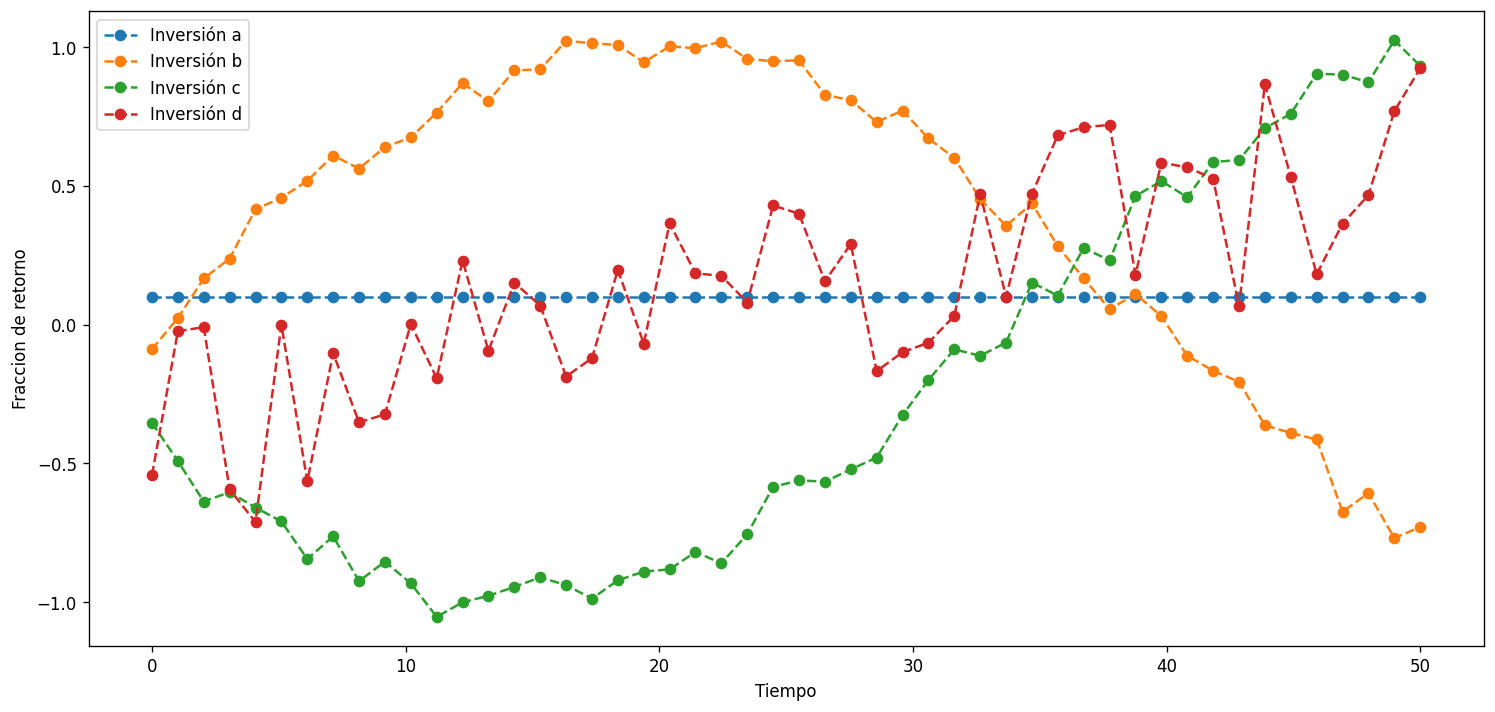

In [12]:
fig,ax  = plt.subplots(1,1,figsize=(15,7),dpi=120)
ax.plot(np.linspace(0,50,50),a, marker='o', linestyle='dashed',label='Inversión a')
ax.plot(np.linspace(0,50,50),b, marker='o', linestyle='dashed',label='Inversión b')
ax.plot(np.linspace(0,50,50),c, marker='o', linestyle='dashed',label='Inversión c')
ax.plot(np.linspace(0,50,50),d, marker='o', linestyle='dashed',label='Inversión d')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Fraccion de retorno')
ax.legend()
plt.show()

In [14]:
# Vector con los vectores de las diferentes lineas
I = np.array([a,b,c,d])
# Promedios de las líneas 
M = np.array([np.mean(x) for x in I])
# Desviación estandar de las líneas
S = np.array([np.std(x) for x in I])

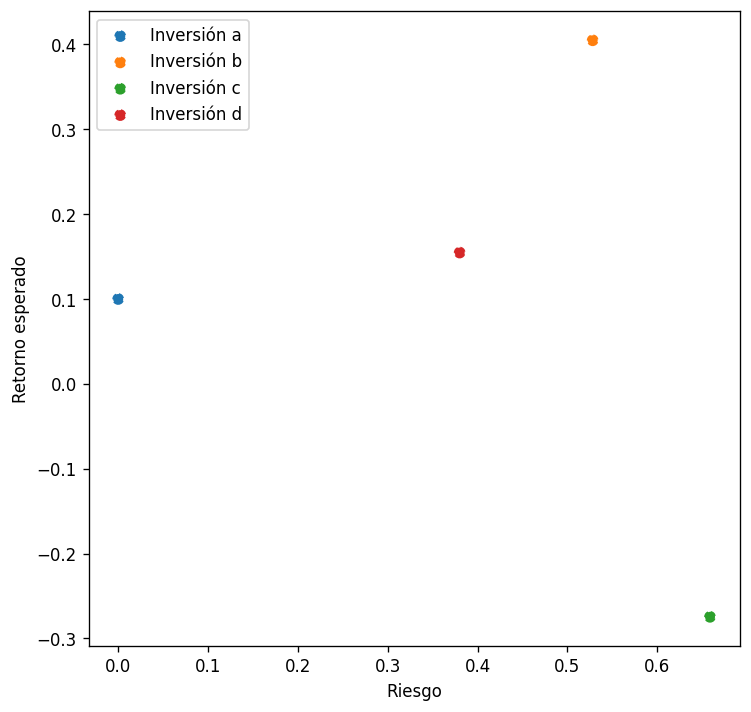

In [16]:
# Se gráfican los promedios y las desviaciones estandat de las 
# inversiones, asumiendo que la desviacipon estandar es el riesgo 
# de la inversión y el promedio es  el retorno esperado
fig,ax  = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(S[0],M[0], linestyle='dashed',label='Inversión a')
ax.scatter(S[1],M[1], linestyle='dashed',label='Inversión b')
ax.scatter(S[2],M[2], linestyle='dashed',label='Inversión c')
ax.scatter(S[3],M[3], linestyle='dashed',label='Inversión d')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retorno esperado')
ax.legend()
plt.show()

**Estandarización**. Para cerrar presentaremos la estandarización de un vector $\mathbf{x}$. Esto es básicamente generar un nuevo vector en donde las entradas se llaman _z-scores_:

$$
\mathbf{z} = \frac{1}{std(\mathbf{x})} (\mathbf{x} - avg(\mathbf{x})\mathbf{1})
$$

Básicamente en este vector si la entrada $z_{1} = 1.7$ esto significa que $x_{1}$ está 1.7 desviaciones estándar por arriba del promedio de entradas del vector $\mathbf{x}$.

# CLASE 24: ÁNGULOS ENTRE VECTORES Y CORRELACIÓN

# 9.2 Ángulos

En el caso de los ángulos seremos muy breves. Es posible calcular el ángulo que existe entre dos vectores y este está dado por la relación

$$
\cos{(\theta)} = \displaystyle\frac{a^T b}{||a||\, ||b||}
$$

Notemos que también será posible expresar el producto interno en términos del ángulo entre dos vectores.

$$
a^T b = ||a||\, ||b||\, \cos{(\theta)}
$$

**Coeficiente de correlación.** Si tenemos dos vectores $a$ y $b$ entonces podemos construir

$$
\tilde{a} = a - avg(a)\mathbf{1} \qquad \tilde{b} = b - avg(b)\mathbf{1}
$$

Entonces se define el coeficiente de correlación como:

$$
\rho = \displaystyle\frac{\tilde{a}^{T}\tilde{b}}{||\tilde{a}||\,||\tilde{b}||}
$$

In [1]:
# Función para restales el promedio
def demean(a):
    return a - np.mean(a)*np.array([1]*len(a))

# Función para hallar la correlación
def correlacion(a, b):
    a, b = demean(a), demean(b)
    return (a@b)/(np.linalg.norm(a) * np.linalg.norm(b))

In [5]:
# Se crean los vectores
a = np.sin(np.linspace(0, 6, 100)) + np.random.uniform(-0.4, 0.4, 100)
b = np.sin(np.linspace(0, 6, 100)) + np.random.uniform(-0.4, 0.4, 100)

In [6]:
print('La correlación entre a y b es: ', correlacion(a, b))

La correlación entre a y b es:  0.8918027073786831


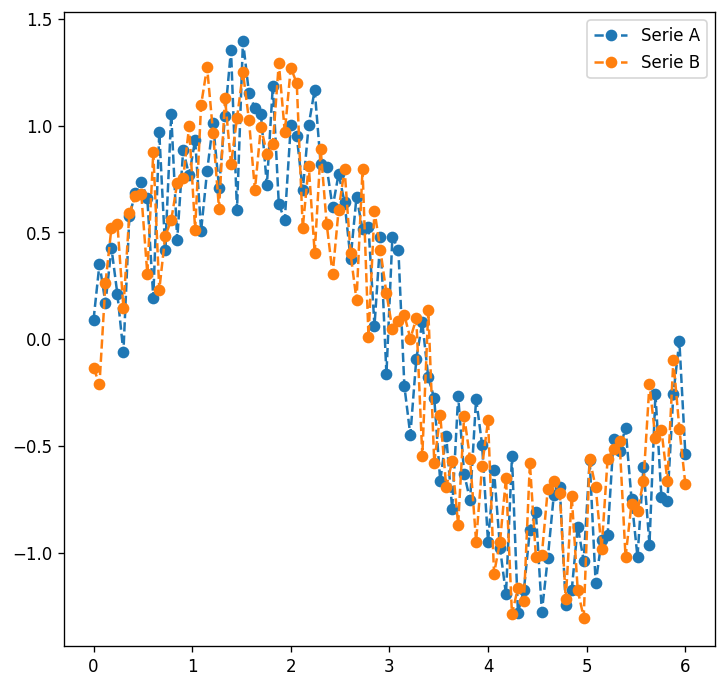

In [7]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(np.linspace(0,6,100),a, label = 'Serie A', marker='o', linestyle='dashed')
ax.plot(np.linspace(0,6,100),b, label = 'Serie B', marker='o', linestyle='dashed')
ax.legend()
plt.show()

Se observa que las dos series siguen un mismo patrón, por tanto su correlación es cercano a 1 de manera positiva.

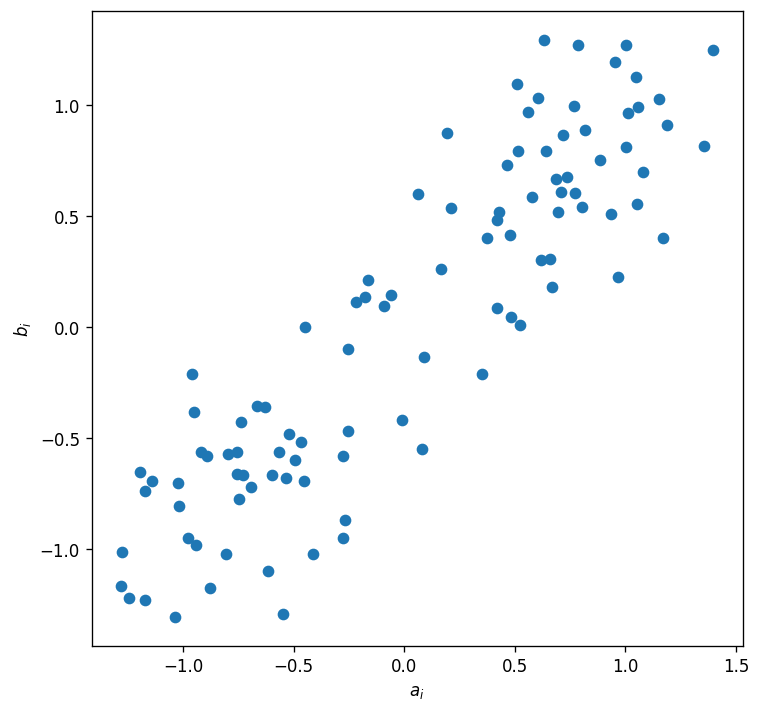

In [8]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(a,b)
ax.set_xlabel(r'$a_{i}$')
ax.set_ylabel(r'$b_{i}$')
plt.show()

Efectivamente, cuando un a incrementa, lo hace de la misma forma b, por los que estan correlacionados positivamente.

In [11]:
# Se crean nuevos vectores
a = np.sin(np.linspace(0, 6, 100)) + np.random.uniform(-0.4, 0.4, 100)
b = np.cos(np.linspace(2, 7, 100)) + np.random.uniform(-0.4, 0.4, 100)

In [12]:
print('La correlación entre a y b es: ', correlacion(a, b))

La correlación entre a y b es:  -0.8985332933216016


Para este caso se tiene un correlación cercana a -1

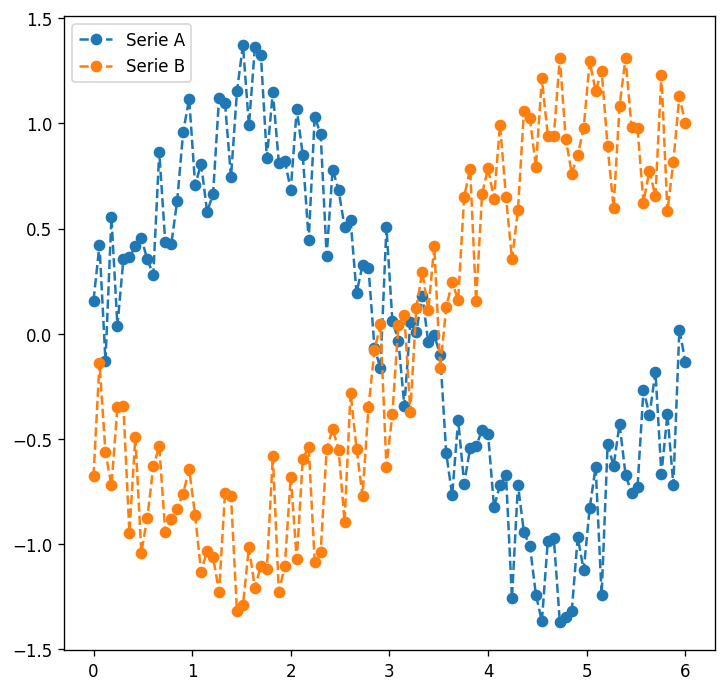

In [13]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(np.linspace(0,6,100),a, label = 'Serie A', marker='o', linestyle='dashed')
ax.plot(np.linspace(0,6,100),b, label = 'Serie B', marker='o', linestyle='dashed')
ax.legend()
plt.show()

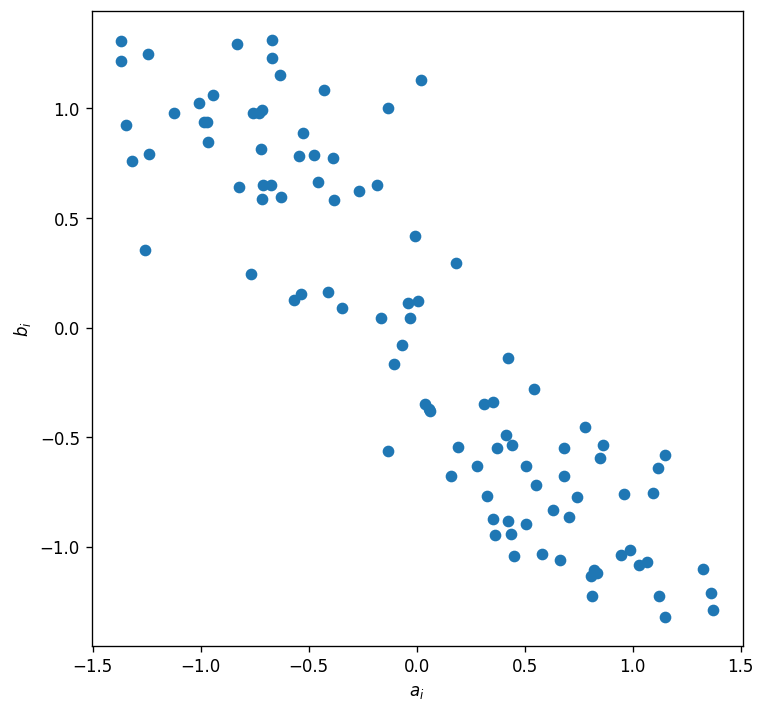

In [14]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(a,b)
ax.set_xlabel(r'$a_{i}$')
ax.set_ylabel(r'$b_{i}$')
plt.show()

Para este caso se observa que las variables estan correlacionadas de manera negativa, es decir que mientras a suba, b va a bajar y viceversa. Por esta razón el valor de la correlación es cercana a 1.

In [19]:
# Se crean nuevos vectores
a = np.cos(np.linspace(0, 6, 100)) + np.random.uniform(-0.4, 0.4, 100)
b = np.exp(np.linspace(2, 7, 100)) + np.random.uniform(-0.4, 0.4, 100)

In [20]:
print('La correlación entre a y b es: ', correlacion(a, b))

La correlación entre a y b es:  0.292733695339692


Para este caso se tiene un valor que se acerca mas a 0.

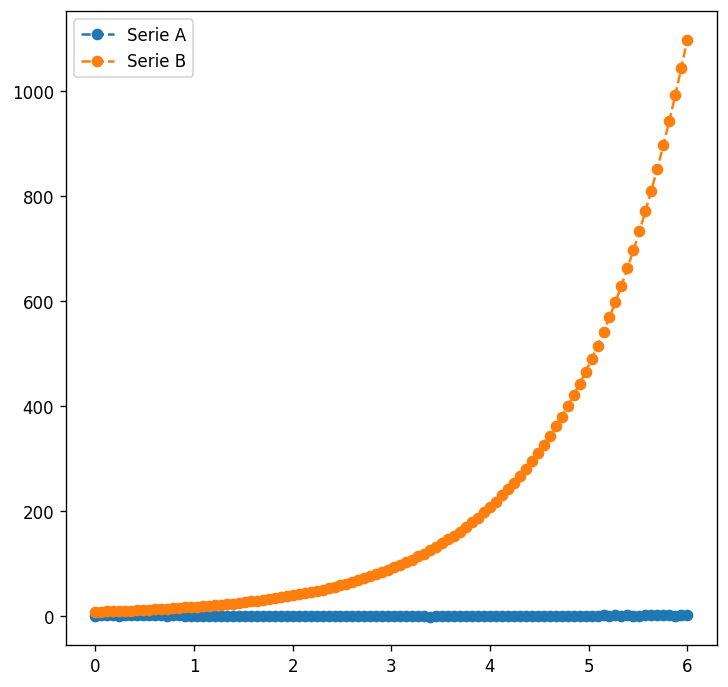

In [21]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(np.linspace(0,6,100),a, label = 'Serie A', marker='o', linestyle='dashed')
ax.plot(np.linspace(0,6,100),b, label = 'Serie B', marker='o', linestyle='dashed')
ax.legend()
plt.show()

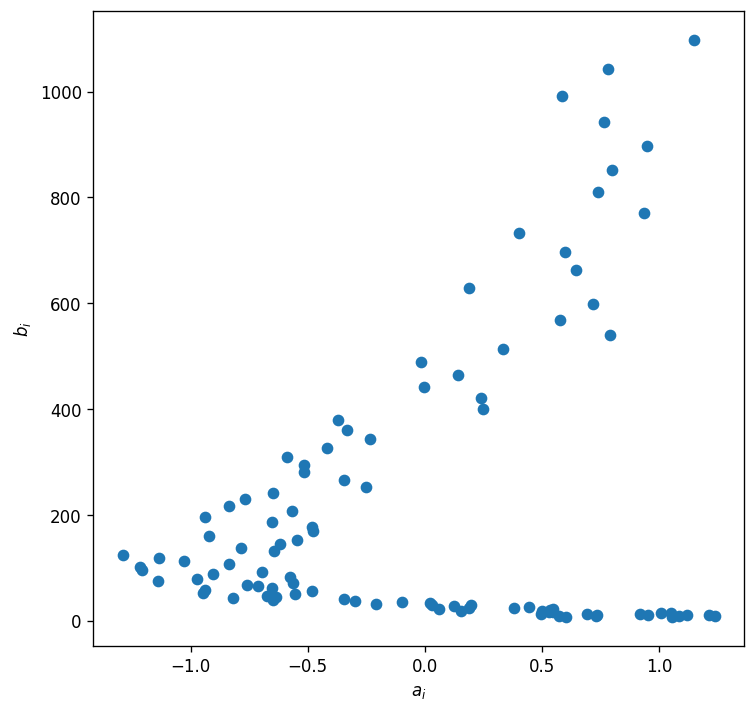

In [22]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(a,b)
ax.set_xlabel(r'$a_{i}$')
ax.set_ylabel(r'$b_{i}$')
plt.show()

Los puntos no siguen ningun patrón de linea, estan dispersado en todo el plano, por tanto la correlación no existe entre a y b, por tanto su  valor es cercano a 0.

El hecho de que dos vectores tenga correlaciones positivas, no significa que una este causada por el otro.

## Enlaces Externos

[Colab Original](https://colab.research.google.com/drive/1FSyuYc9uEqd-84pecq84Ez6HKoRm1JPZ?usp=sharing#scrollTo=r358TPdtzq-_)